# Limearizações

## Teoria

Técnicas de domínio espacial operam diretamente nos pixels de uma imagem.
Geralmente as técnicas de domínio espacial são mais eficientes computacionalmente e requerem menos recursos de processamento para serem implementadas.

g(x,y) = T[f(x,y)]

## Implementação

### Inicialização

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import math as m
from IPython.display import Image

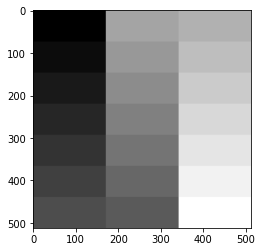

In [3]:
img = cv2.imread('../gcPDI/imgPDI/gray21.512.tiff')
plt.imshow(img)

## Utilizando

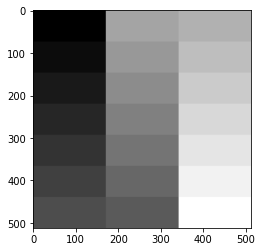

In [4]:
imgRBG = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRBG)
plt.show()

In [5]:
#Limiarizações
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
ret, th6 = cv2.threshold(img,127,255,cv2.THRESH_MASK)

In [6]:
titles = ["Original", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV", "MASK"]
imagesp1 = [img, th1, th2, th3, th4, th5, th6]

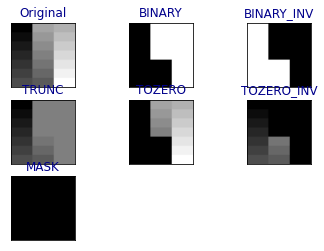

In [7]:
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(imagesp1[i], 'gray')
    plt.title(titles[i], color = "darkblue")
    plt.xticks([]),plt.yticks([])
plt.show()

## Testando Histogramas

In [8]:
img2hist = cv2.imread("../gcPDI/imgPDI/gray21.512.tiff",cv2.IMREAD_GRAYSCALE) #Usando img2hist para separar de img
img2hist.shape #Curiosidade

(512, 512)

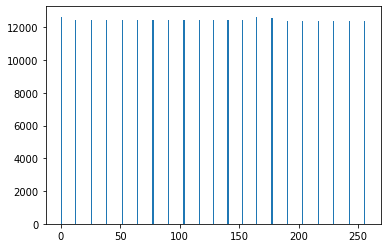

In [9]:
#Histograma utilizando matplotlib
plt.hist(img2hist.ravel(),256,[0,256])
plt.show()

In [10]:
#Obtendo histograma pelo OpenCV
histr = cv2.calcHist([img2hist],[0],None,[256],[0,256])

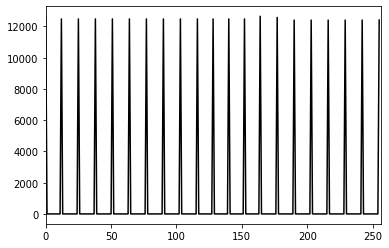

In [11]:
#Explorandoo gráfico
plt.plot(histr,color = "black")
plt.xlim([0,256])
plt.show()

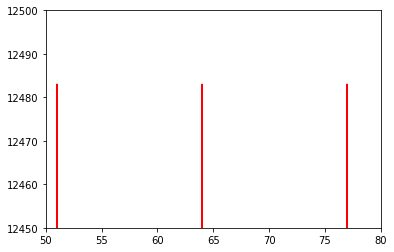

In [12]:
#"Zoom" no gráfico
plt.plot(histr,color = "red")
plt.xlim([50,80])
plt.ylim([12450,12500])
plt.show()

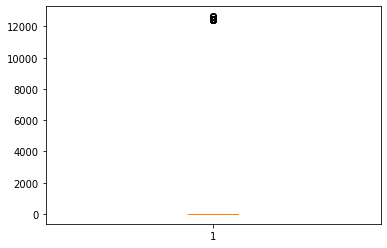

In [13]:
#Gráfico Boxplot
plt.boxplot(histr)
plt.show()
#Infelizmente não é muito informativo.

## Fazendo o processo inverso
### Testando leitura, conversões, e escritas

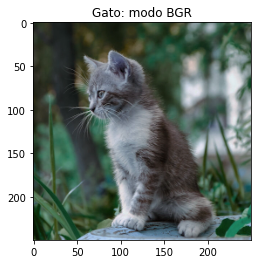

In [14]:
#Carregamento da imagem2
img2 = cv2.imread('../gcPDI/imgMy/kitsmall.jpg')
plt.imshow(img2)
plt.title("Gato: modo BGR")
plt.show()

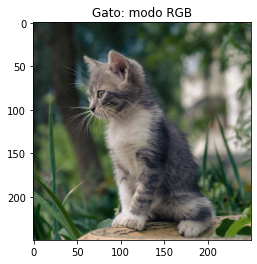

In [15]:
#Convertendo para RGB
imgRBG2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(imgRBG2)
plt.title("Gato: modo RGB")
plt.show()

In [16]:
imgGray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

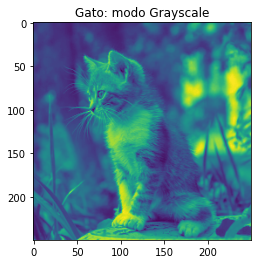

In [17]:
plt.imshow(imgGray2)
plt.title("Gato: modo Grayscale")
plt.show()
#Ué?

In [18]:
cv2.imshow("Converted Image",imgGray2)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Então a conversão foi correta

In [19]:
#Salva Imagem
cv2.imwrite("../gcPDI/imgMy/graykitsmall.jpg", imgGray2)
#Ao abrir o arquivo, confirma que a conversão foi feita

True

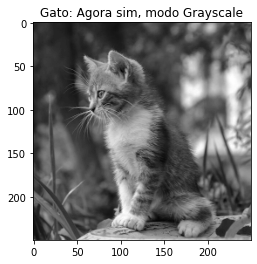

In [20]:
plt.imshow(imgGray2, "gray")
plt.title("Gato: Agora sim, modo Grayscale")
plt.show()

### Histogramas

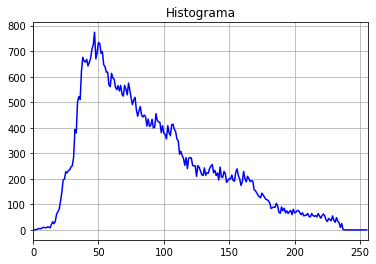

In [21]:
#Retorno do histograma
histr2 = cv2.calcHist([imgGray2],[0],None,[256],[0,256])
plt.plot(histr2,color = "blue")
plt.grid("True")
plt.xlim([0,256])
plt.title("Histograma")
plt.show()

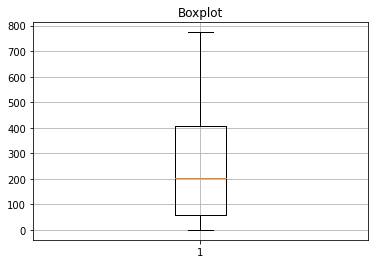

In [22]:
bp =plt.boxplot(histr2, sym="*")
plt.title("Boxplot")
plt.grid("True")
plt.show()

In [23]:
#Valores do Boxplot (algum dia automatizar)
print(np.max(histr2))
print(np.percentile(histr2, 75))
print(np.median(histr2))
print(np.percentile(histr2, 25))
print(np.min(histr2))

774.0
407.25
203.5
60.0
0.0


In [24]:
aux=0
for bit in histr2:
    if aux <= 245: #Após intensidade 245, pelo histograma, o retorno é zero, então limita o número de prints.
        if bit == 0.0 or bit == 60.0 or (bit >= (203-2) and bit <=(203+2)) or (bit >= (407-2) and bit <=(407+2)) or bit == 774.0:
            print("Valor Pixel:"+str(aux)+"->"+str(bit))
    aux+=1

Valor Pixel:1->[0.]
Valor Pixel:47->[774.]
Valor Pixel:87->[407.]
Valor Pixel:89->[405.]
Valor Pixel:99->[408.]
Valor Pixel:103->[408.]
Valor Pixel:150->[201.]
Valor Pixel:165->[201.]
Valor Pixel:198->[60.]
Valor Pixel:205->[60.]
Valor Pixel:238->[0.]
Valor Pixel:239->[0.]
Valor Pixel:240->[0.]
Valor Pixel:241->[0.]
Valor Pixel:242->[0.]
Valor Pixel:243->[0.]
Valor Pixel:244->[0.]
Valor Pixel:245->[0.]


# Valores de interesse para Limiarização (manual):
47: Corresponde ao valor máximo de 774

87: Corresponde ao valor percentil 75% de 407

150: Corresponde próximo a mediana de 203

205: Corresponde próximo ao percentil 25% de 60

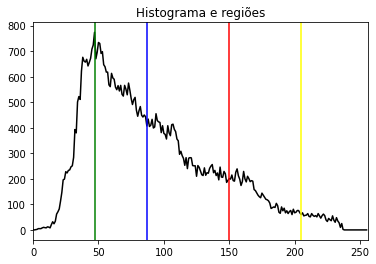

In [25]:
plt.plot(histr2,color = "black")
plt.xlim([0,256])
plt.title("Histograma e regiões")
plt.axvline(x=47, color = "green")
plt.axvline(x=87, color = "blue")
plt.axvline(x=150, color = "red")
plt.axvline(x=205, color = "yellow")
plt.show()

## Cenários de Limiarização:

In [26]:
vals = [47,87,150,205]

T = 47


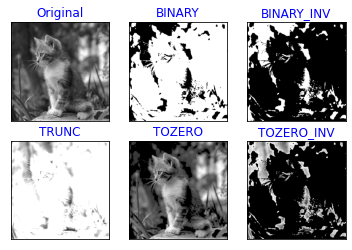

T = 87


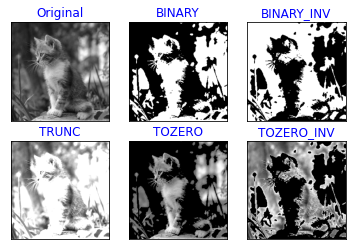

T = 150


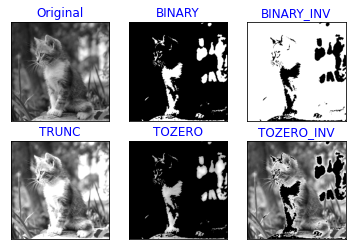

T = 205


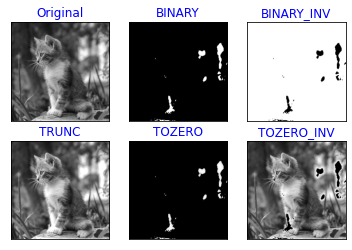

In [27]:
titles = ["Original", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
for val in vals:
    print("T = "+str(val))
    ret, th1 = cv2.threshold(imgGray2,val,255,cv2.THRESH_BINARY)
    ret, th2 = cv2.threshold(imgGray2,val,255,cv2.THRESH_BINARY_INV)
    ret, th3 = cv2.threshold(imgGray2,val,255,cv2.THRESH_TRUNC)
    ret, th4 = cv2.threshold(imgGray2,val,255,cv2.THRESH_TOZERO)
    ret, th5 = cv2.threshold(imgGray2,val,255,cv2.THRESH_TOZERO_INV)
    #ret, th6 = cv2.threshold(imgGray2,val,255,cv2.THRESH_MASK) Aprender melhor depois
    images = [imgGray2, th1, th2, th3, th4, th5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray')
        plt.title(titles[i], color = "blue")
        plt.xticks([]),plt.yticks([])
    plt.show()    

# Limiarização Adaptativa

Adaptive Threshold


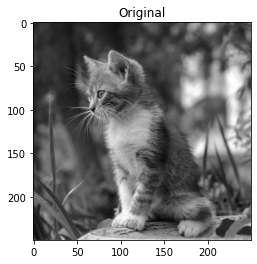

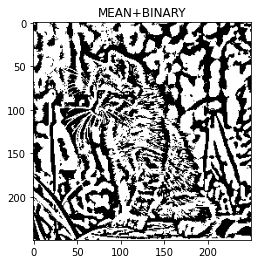

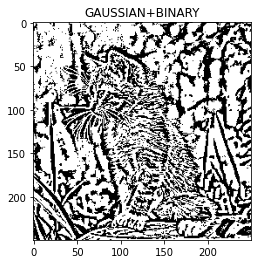

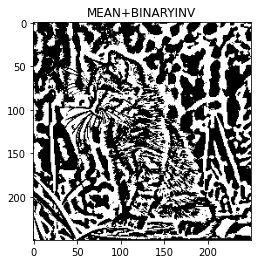

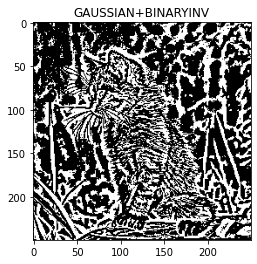

In [28]:
adap1 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
adap2 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
adap3 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
adap4 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
adaparray = [imgGray2, adap1, adap2, adap3, adap4]
titles = ["Original", "MEAN+BINARY", "GAUSSIAN+BINARY", "MEAN+BINARYINV", "GAUSSIAN+BINARYINV"]
print("Adaptive Threshold")
for i in range(5):
    plt.imshow(adaparray[i],"gray")
    plt.title(titles[i])
    plt.show()

## Teste em lote

In [40]:
#Resetando img como a figura gray21, para evitar bugs
img = cv2.imread("../gcPDI/imgPDI/gray21.512.tiff", 0)
cv2.imshow("Confirm grayscale",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
blocksizes = list(range(3,31,2))

#### Testando adaptativos e blockSizes: Gato

Block Size = 3


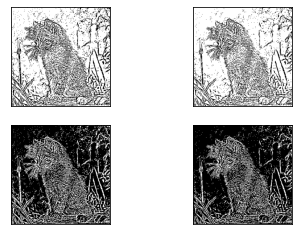

Block Size = 5


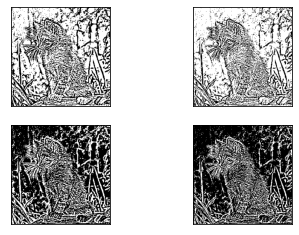

Block Size = 7


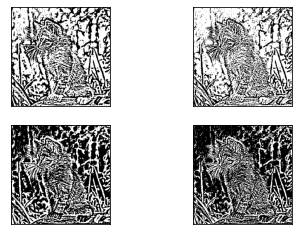

Block Size = 9


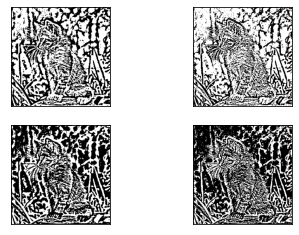

Block Size = 11


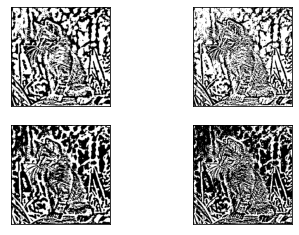

Block Size = 13


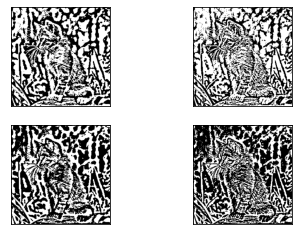

Block Size = 15


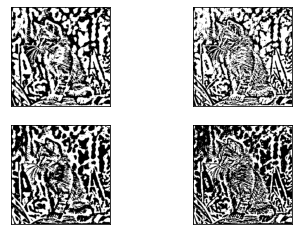

Block Size = 17


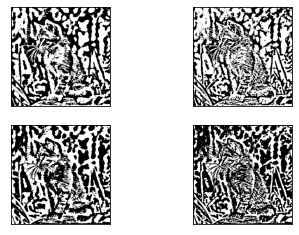

Block Size = 19


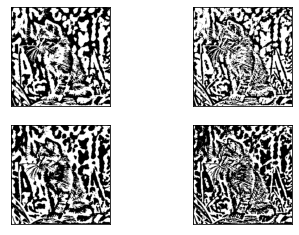

Block Size = 21


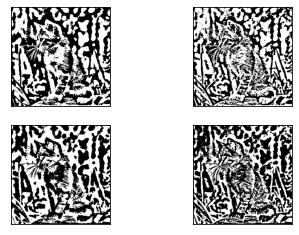

Block Size = 23


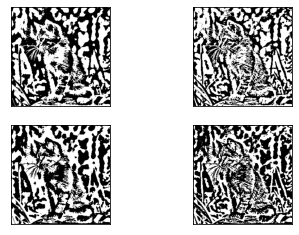

Block Size = 25


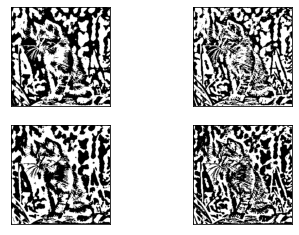

Block Size = 27


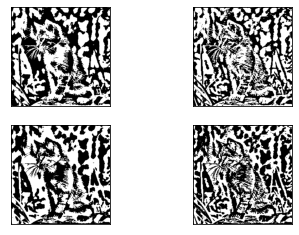

Block Size = 29


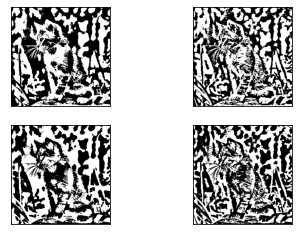

In [59]:
for i in range(len(blocksizes)):
    adap1 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blocksizes[i],2)
    adap2 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksizes[i],2)
    adap3 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,blocksizes[i],2)
    adap4 = cv2.adaptiveThreshold(imgGray2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,blocksizes[i],2)
    imgresul = [adap1, adap2, adap3, adap4]
    print("Block Size = "+str(blocksizes[i]))
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(imgresul[i], 'gray')
        plt.xticks([]),plt.yticks([])
    plt.show()

#### Testando adaptativos e blockSizes: Grayscale

Block Size = 3


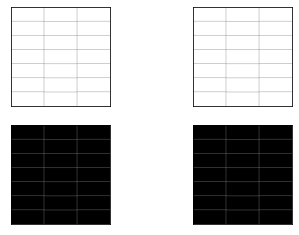

Block Size = 5


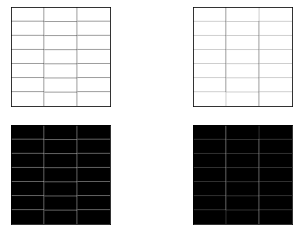

Block Size = 7


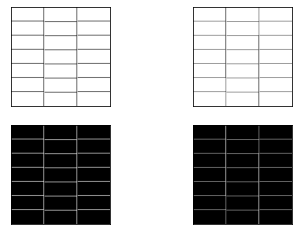

Block Size = 9


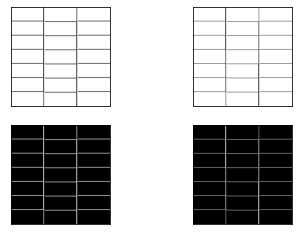

Block Size = 11


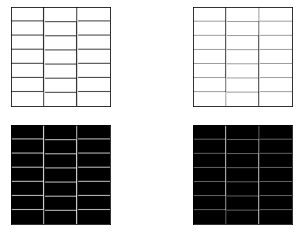

Block Size = 13


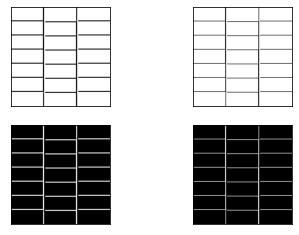

Block Size = 15


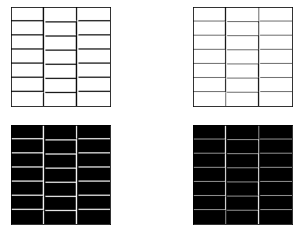

Block Size = 17


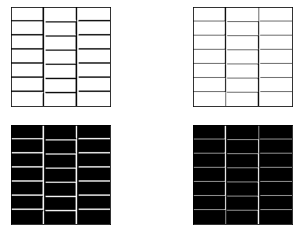

Block Size = 19


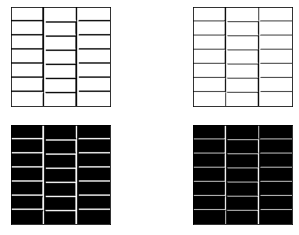

Block Size = 21


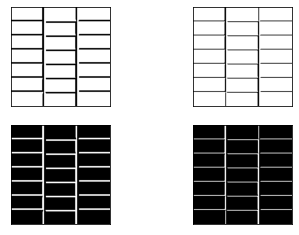

Block Size = 23


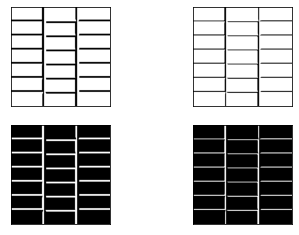

Block Size = 25


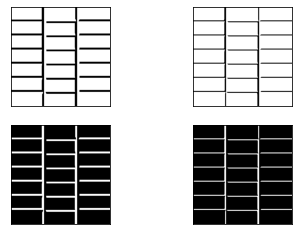

Block Size = 27


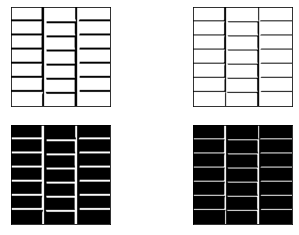

Block Size = 29


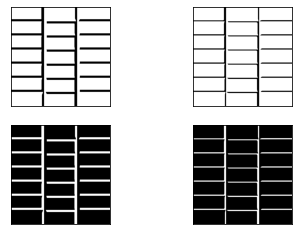

In [65]:
for i in range(len(blocksizes)):
    adap1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blocksizes[i],2)
    adap2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksizes[i],2)
    adap3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,blocksizes[i],2)
    adap4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,blocksizes[i],2)
    imgresul = [adap1, adap2, adap3, adap4]
    print("Block Size = "+str(blocksizes[i]))
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(imgresul[i], 'gray')
        plt.xticks([]),plt.yticks([])
    plt.show()